**Imports**

In [ ]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

loading the dataset

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

exploring the data

In [ ]:
print(type(x_train))
print(type(y_train[5]))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


<class 'numpy.ndarray'>
<class 'numpy.uint8'>
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


visualize training data

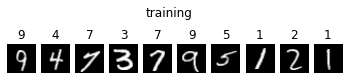

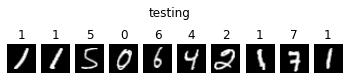

In [ ]:
import random

def visualize_mnist_data(data ,labels = None , n_samples = 10, title = ''):
  fig, axs = plt.subplots(1,n_samples)
  for  ax , i in zip(axs,random.sample(range(len(data)), n_samples)):
    
    ax.imshow(data[i], cmap = 'gray')
    ax.set_title(labels[i])
    ax.axis("off")
    fig.suptitle(title)
    #fig.tight_layout()
    fig.subplots_adjust(top =0.9,bottom=0.7)

visualize_mnist_data(x_train,y_train,10 , "training")
visualize_mnist_data(x_test,y_test,10, "testing")

preprocessing data

In [ ]:
from keras.utils import to_categorical

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

x_train = x_train / 255.0
x_test = x_test / 255.0

ohe_y_train = to_categorical(y_train)
ohe_y_test = to_categorical(y_test)
print(ohe_y_train.shape)
print(ohe_y_train[:15])

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


building the model

In [ ]:
from keras.layers import Conv2D, Dense, Flatten,Dropout, BatchNormalization, MaxPooling2D
from keras.models import Sequential


model = Sequential()

model.add(Conv2D(filters = 16,kernel_size = 3, padding="same",activation = "relu" , input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32,kernel_size = 3, padding="same",activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64,kernel_size = 3, padding="same",activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(10 , activation = "softmax"))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 14, 14, 16)       64        
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 32)        

compiling the model

In [ ]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

callbacks = [EarlyStopping(patience= 10)]
history = model.fit(x_train, ohe_y_train, batch_size= 1024,epochs = 100, validation_split = 0.15, callbacks = callbacks)

Epoch 1/100
50/50 [==============================] - 2s 26ms/step - loss: 0.8618 - accuracy: 0.7257 - val_loss: 2.6008 - val_accuracy: 0.1063
Epoch 2/100
50/50 [==============================] - 1s 20ms/step - loss: 0.2311 - accuracy: 0.9271 - val_loss: 3.8150 - val_accuracy: 0.1063
Epoch 3/100
50/50 [==============================] - 1s 21ms/step - loss: 0.1563 - accuracy: 0.9515 - val_loss: 4.3407 - val_accuracy: 0.1063
Epoch 4/100
50/50 [==============================] - 1s 22ms/step - loss: 0.1229 - accuracy: 0.9614 - val_loss: 4.2465 - val_accuracy: 0.1063
Epoch 5/100
50/50 [==============================] - 1s 20ms/step - loss: 0.1055 - accuracy: 0.9658 - val_loss: 2.9745 - val_accuracy: 0.1504
Epoch 6/100
50/50 [==============================] - 1s 20ms/step - loss: 0.0891 - accuracy: 0.9724 - val_loss: 1.8923 - val_accuracy: 0.3636
Epoch 7/100
50/50 [==============================] - 1s 20ms/step - loss: 0.0817 - accuracy: 0.9736 - val_loss: 1.0108 - val_accuracy: 0.6164
Epoch 

In [ ]:
scores = model.evaluate(x_test, ohe_y_test, verbose=1)
print(scores) 
print("accuracy is {} %".format(100 * scores[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0211 - accuracy: 0.9921
[0.02110494300723076, 0.9921000003814697]
accuracy is 99.21000003814697 %


(28, 28, 1)
(28, 28, 1)
32/32 [==============================] - 0s 3ms/step
prediction is 3


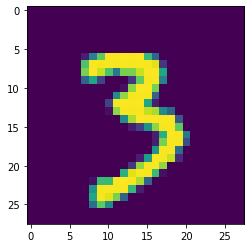

In [ ]:
print(x_test[30].shape)
print(x_train[30].shape)

predictions = model.predict(x_test[:1023])

plt.imshow(x_test[30].reshape(28,28) * 255)
print("prediction is {}".format(np.argmax(predictions[30])) )